In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
from __future__ import print_function
#from sklearn import datasets
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-2-61057b87acd8>, line 11)

In [3]:
import missingno

ModuleNotFoundError: No module named 'missingno'

In [57]:

data = pd.read_excel('C:/Users/IsaacHolmes/Desktop/pfm_train.xlsx')


In [58]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,1,0,1,4,0,77,1,0,...,3,80,1,7,2,4,7,5,0,7
1,54,0,2,0,1,4,0,1245,4,1,...,1,80,1,33,2,1,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,37,0,1,1,16,4,3,868,4,0,...,4,80,2,9,2,3,1,0,0,0
1207,26,1,2,0,2,3,0,1053,1,0,...,2,80,1,6,2,3,3,2,1,2


In [59]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,1,0,1,4,0,77,1,0,...,3,80,1,7,2,4,7,5,0,7
1,54,0,2,0,1,4,0,1245,4,1,...,1,80,1,33,2,1,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,39,0,1,0,1,1,0,1026,4,1,...,3,80,1,21,3,3,21,6,11,8
4,28,1,2,0,1,3,1,1111,1,0,...,1,80,2,1,2,3,1,0,0,0


In [60]:
data.shape

(1208, 31)

In [61]:
data.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.00000,1208.000000,1208.000000,1208.000000,1208.00000,1208.000000,...,1208.000000,1208.0,1208.000000,1208.00000,1208.000000,1208.00000,1208.00000,1208.000000,1208.000000,1208.000000
mean,36.944536,0.160596,1.088576,0.378311,9.56043,2.934603,1.073675,1034.468543,2.72351,0.406457,...,2.684603,80.0,0.794702,11.07947,2.821192,2.74255,6.92798,4.158113,2.212748,4.088576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,43.000000,0.000000,1.000000,1.000000,15.00000,4.000000,2.000000,1563.250000,4.00000,1.000000,...,4.000000,80.0,1.000000,15.00000,3.000000,3.00000,9.00000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.00000,5.000000,4.000000,2065.000000,4.00000,1.000000,...,4.000000,80.0,3.000000,40.00000,6.000000,4.00000,37.00000,18.000000,15.000000,17.000000


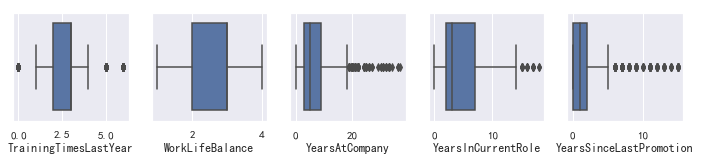

In [62]:
import seaborn as sns
fig, ax = plt.subplots(1,5, figsize=(12, 2))
sns.boxplot(x=data.columns[25], data=data, ax=ax[0])
sns.boxplot(x=data.columns[26], data=data, ax=ax[1])
sns.boxplot(x=data.columns[27], data=data, ax=ax[2])
sns.boxplot(x=data.columns[28], data=data, ax=ax[3])
sns.boxplot(x=data.columns[29], data=data, ax=ax[4])

In [63]:
data.isnull().any

<bound method DataFrame.any of         Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0     False      False           False       False             False   
1     False      False           False       False             False   
...     ...        ...             ...         ...               ...   
1206  False      False           False       False             False   
1207  False      False           False       False             False   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0         False           False           False                    False   
1         False           False           False                    False   
...         ...             ...             ...                      ...   
1206      False           False           False                    False   
1207      False           False           False                    False   

      Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \

In [64]:
total = data.isnull().sum().sort_values(ascending=False)

In [65]:
print(total)

YearsWithCurrManager    0
MaritalStatus           0
                       ..
YearsInCurrentRole      0
Age                     0
Length: 31, dtype: int64


In [66]:
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

In [67]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [68]:
missing_data.head(20)

,Total,Percent
YearsWithCurrManager,0,0.0
MaritalStatus,0,0.0
...,...,...
Over18,0,0.0
OverTime,0,0.0


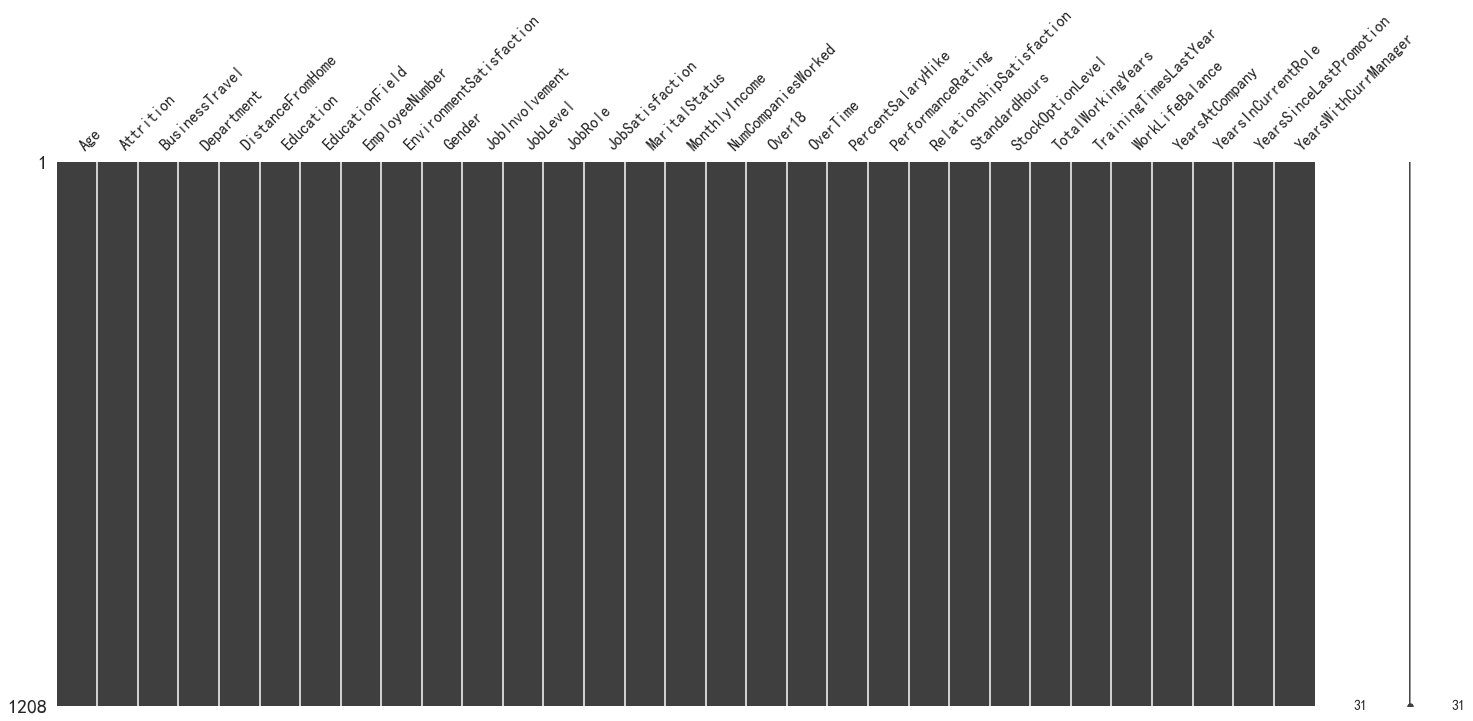

In [69]:
missingno.matrix(data)

In [70]:
data=data.dropna(thresh=data.shape[0]*0.5,axis=1)

In [71]:
data.dropna(axis=0,how='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,1,0,1,4,0,77,1,0,...,3,80,1,7,2,4,7,5,0,7
1,54,0,2,0,1,4,0,1245,4,1,...,1,80,1,33,2,1,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,37,0,1,1,16,4,3,868,4,0,...,4,80,2,9,2,3,1,0,0,0
1207,26,1,2,0,2,3,0,1053,1,0,...,2,80,1,6,2,3,3,2,1,2


In [79]:
data=data.dropna(axis=0)

In [80]:
data.duplicated().sum()

108

In [81]:
data=data.drop_duplicates()

In [82]:
data.columns

Index([u'Age', u'Attrition', u'BusinessTravel', u'Department',
       u'DistanceFromHome', u'Education', u'EducationField', u'EmployeeNumber',
       u'EnvironmentSatisfaction', u'Gender', u'JobInvolvement', u'JobLevel',
       u'JobRole', u'JobSatisfaction', u'MaritalStatus', u'MonthlyIncome',
       u'NumCompaniesWorked', u'Over18', u'OverTime', u'PercentSalaryHike',
       u'PerformanceRating', u'RelationshipSatisfaction', u'StandardHours',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager'],
      dtype='object')

In [83]:
id_col=['EmployeeNumber']
cont_col=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Age','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print(data[cont_col])

      Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0             0               1           0               0       0        0   
1             0               2           0               0       1        0   
...         ...             ...         ...             ...     ...      ...   
1141          1               1           0               0       0        3   
1207          1               2           0               0       0        3   

      MaritalStatus  Over18  OverTime  Age  ...  RelationshipSatisfaction  \
0                 0       1         0   37  ...                         3   
1                 0       1         0   54  ...                         1   
...             ...     ...       ...  ...  ...                       ...   
1141              1       1         1   22  ...                         1   
1207              2       1         1   26  ...                         2   

      StandardHours  StockOptionLevel  TotalWorkingYears

In [84]:
#for i in cat_col:
 #   print (pd.Series(data[i]).value_counts())
 #   plt.plot(data[i])
 #   plt.savefig('C:/Users/IsaacHolmes/Desktop/cat_col_fig.png')#妈耶这能看出来个啥

In [85]:
dummies = pd.get_dummies(data[cat_col])
dummies

NameError: name 'cat_col' is not defined

In [86]:
data[cont_col].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.0,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.161818,1.088182,0.377273,1.083636,0.406364,2.735455,1.238182,1.0,0.278182,36.999091,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,0.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,1.0,1.000000,43.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,2.000000,2.000000,4.000000,1.000000,7.000000,2.000000,1.0,1.000000,60.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [87]:
skewed_feats = data[cont_col].apply(lambda x:(x.dropna()).skew())
skewed_feats

Attrition                  1.839036
BusinessTravel             0.098194
                             ...   
YearsSinceLastPromotion    1.950180
YearsWithCurrManager       0.865639
Length: 30, dtype: float64

In [88]:
skewed_feats = skewed_feats[skewed_feats>0.75] 
skewed_feats

Attrition                  1.839036
Department                 1.154946
                             ...   
YearsSinceLastPromotion    1.950180
YearsWithCurrManager       0.865639
Length: 16, dtype: float64

In [89]:
skewed_feats = skewed_feats.index
skewed_feats

Index([u'Attrition', u'Department', u'EducationField', u'OverTime',
       u'DistanceFromHome', u'JobLevel', u'MonthlyIncome',
       u'NumCompaniesWorked', u'PercentSalaryHike', u'PerformanceRating',
       u'StockOptionLevel', u'TotalWorkingYears', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager'],
      dtype='object')

In [90]:
data[skewed_feats] = np.log1p(data[skewed_feats])
skewed_feats

Index([u'Attrition', u'Department', u'EducationField', u'OverTime',
       u'DistanceFromHome', u'JobLevel', u'MonthlyIncome',
       u'NumCompaniesWorked', u'PercentSalaryHike', u'PerformanceRating',
       u'StockOptionLevel', u'TotalWorkingYears', u'YearsAtCompany',
       u'YearsInCurrentRole', u'YearsSinceLastPromotion',
       u'YearsWithCurrManager'],
      dtype='object')

In [91]:
scaled = preprocessing.scale(data[cont_col])
scaled = pd.DataFrame(scaled,columns=cont_col)
scaled

d:\softwares\python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.439384,-0.167618,-0.700515,-1.036743,-0.827365,-1.426656,-1.579927,0.0,-0.620798,0.000101,...,0.277329,0.0,0.478043,-0.300716,-0.625343,1.788860,0.356629,0.525799,-0.958186,0.905544
1,-0.439384,1.733202,-0.700515,-1.036743,1.208656,-1.426656,-1.579927,0.0,-0.620798,1.882064,...,-1.549391,0.0,0.478043,1.778552,-0.625343,-2.491951,-0.023761,0.295760,-0.114897,0.323744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2.275912,-0.167618,-0.700515,-1.036743,-0.827365,0.137972,-0.303921,0.0,1.610829,-1.660455,...,-1.549391,0.0,-1.056675,-2.292865,-0.625343,0.361923,-1.476409,-1.734907,-0.958186,-1.668519
1099,2.275912,1.733202,-0.700515,-1.036743,-0.827365,0.137972,0.972085,0.0,1.610829,-1.217640,...,-0.636031,0.0,0.478043,-0.492605,-0.625343,0.361923,-0.559890,-0.348761,-0.114897,-0.308588


In [267]:
#m = dummies.join(scaled)
#data_cleaned = data[id_col].join(m)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0.000000,1,0.000000,0.693147,4,0.000000,77,1,0,...,3,80,0.693147,2.079442,2,4,2.079442,1.791759,0.000000,2.079442
1,54,0.000000,2,0.000000,0.693147,4,0.000000,1245,4,1,...,1,80,0.693147,3.526361,2,1,1.791759,1.609438,0.693147,1.609438
2,34,0.693147,2,0.000000,2.079442,3,0.000000,147,1,0,...,4,80,0.000000,2.302585,3,3,2.302585,2.079442,0.000000,1.945910
3,39,0.000000,1,0.000000,0.693147,1,0.000000,1026,4,1,...,3,80,0.693147,3.091042,3,3,3.091042,1.945910,2.484907,2.197225
4,28,0.693147,2,0.000000,0.693147,3,0.693147,1111,1,0,...,1,80,1.098612,0.693147,2,3,0.693147,0.000000,0.000000,0.000000
5,24,0.000000,1,0.693147,1.609438,1,0.693147,1445,4,1,...,3,80,1.098612,1.791759,3,3,1.791759,1.609438,0.000000,1.386294
6,29,0.000000,1,0.000000,2.302585,5,1.609438,455,2,0,...,3,80,0.000000,1.609438,2,3,1.386294,1.098612,1.098612,1.098612
7,36,0.000000,1,0.693147,1.098612,2,0.693147,513,2,0,...,2,80,1.098612,2.397895,2,3,2.397895,2.302585,2.302585,0.000000
8,33,0.000000,1,0.000000,1.609438,4,0.693147,305,3,1,...,4,80,0.000000,2.079442,3,3,1.386294,1.098612,0.693147,0.693147
9,34,0.000000,1,0.000000,1.098612,4,1.098612,1383,3,1,...,4,80,0.000000,2.708050,2,4,2.708050,2.484907,1.609438,2.484907


In [94]:
corrmat=data.corr()
corrmat
#corrmat

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.175393,-0.018348,-0.005188,-0.013488,0.198558,-0.001467,-0.010953,0.011803,0.029794,...,0.063489,NaN,0.018357,0.651881,-0.051702,-0.001042,0.273525,0.200862,0.213246,0.177811
Attrition,-0.175393,1.000000,0.099958,0.081003,0.083634,-0.046494,0.039636,-0.045168,-0.097003,-0.016750,...,-0.051749,NaN,-0.173795,-0.241393,-0.043395,-0.048794,-0.193116,-0.186026,-0.073512,-0.189950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YearsSinceLastPromotion,0.213246,-0.073512,0.016252,-0.009297,-0.015127,0.052576,0.004496,-0.003916,0.019482,0.020117,...,0.049738,NaN,0.023783,0.388922,0.008355,0.003432,0.574468,0.536048,1.000000,0.497276
YearsWithCurrManager,0.177811,-0.189950,0.001929,-0.017637,-0.003850,0.056081,0.043226,0.015096,-0.013052,-0.009964,...,-0.006719,NaN,0.045976,0.508106,-0.027515,-0.000808,0.820804,0.730401,0.497276,1.000000


In [214]:
def shuffle_data(X,y,seed=None):
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    
    return x[idx],y[idx]

In [215]:
#正则化数据集X
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    
    for col in range(np.shape(X)[1]):
        if std[col]:
            x_std[:,col] = (X_std[:,col]-mean[col])/std[col]
    return X_std


In [216]:
#划分数据集为训练集和测试集
def train_test_split(X,y,test_size=0.2,shuffle=True,seed=None):
    if shuffle:
        X,y = shuffle_data(X,y,seed)
    
    n_train_samples = int(x.shape[0]*(1-test_size))
    x_train,x_test = X[:n_train_samples],X[n_train_samples:]
    y_train,y_test = y[:n_train_samples],y[n_train_samples:]
    
    return x_train,x_test,y_train,y_test

In [217]:
#计算矩阵X的协方差矩阵
def calculate_covariance_matrix(X,Y=np.empty((0,0))):
    if not Y.any():
        Y=X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1/(n_samples-1))*(X-X.mean(axis=0)).T.dot(Y-Y.mean(axis=0))
    return np.array(covariance_matrix,dtype=float)

In [218]:
#计算数据集X每列的方差
def calculate_variaance(X):
    n_samples = np.shape(X)[0]
    variance = (1/n_samples)*np.diag((X-X.mean(axis=0)).T.dot(X-X.mean(axis=0)))
    return variance


In [219]:
#计算数据集每列的标准差
def calculate_std_dev(X):
    std_dev = np.sqrt(calculate_variance(X))
    return std_dev

#计算相关系数矩阵
def calculate_correlation_matrix(X, Y=np.empty([0])):
    # 先计算协方差矩阵
    covariance_matrix = calculate_covariance_matrix(X, Y)
    # 计算X, Y的标准差
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance_matrix, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

In [220]:
#计算数据集每列的标准差
def calculate_std_dev(X):
    std_dev = np.sqrt(calculate_variance(X))
    return std_dev

#计算相关系数矩阵
def calculate_correlation_matrix(X, Y=np.empty([0])):
    # 先计算协方差矩阵
    covariance_matrix = calculate_covariance_matrix(X, Y)
    # 计算X, Y的标准差
    std_dev_X = np.expand_dims(calculate_std_dev(X), 1)
    std_dev_y = np.expand_dims(calculate_std_dev(Y), 1)
    correlation_matrix = np.divide(covariance_matrix, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)

In [221]:
data = data_cleaned
datamatrix = data_cleaned.values
class PCA():
    def __init__(self):
        self.eigen_values = None
        self.eigen_vectors = None
        self.k = 5
#将原始数据集X通过PCA降维  
    def transform(self,X):
        covariance = calculate_covariance_matrix(X)
        self.eigen_values,self.eigen_vectors = np.linalg.eig(covariance)
        
        idx = self.eigen_values.argsort()[::-1]
        eigenvalues = self.eigen_values[idx][:self.k]
        eigenvectors = self.eigen_vectors[:,idx][:,:self.k]
        
        X_transformed = X.dot(eigenvectors)
        
        return X_transformed
#data  = pd.read_excel('C:/Users/IsaacHolmes/Desktop/pfm_train.xlsx')
#table = data.sheets()[0]
#nrows = table.nrows  # 行数
#ncols = table.ncols  # 列数
#c1 = np.arange(0, nrows, 1)
#datamatrix = np.zeros((nrows, ncols))
#for x in range(ncols):
    #3cols = table.col_values(x)
    #minVals = min(cols)
    #maxVals = max(cols)
   # cols1 = np.matrix(cols)  # 把list转换为矩阵进行矩阵操作
   # ranges = maxVals - minVals
   # b = cols1 - minVals
  #  normcols = b / ranges  # 数据进行归一化处理
 #   datamatrix[:, x] = normcols # 把数据进行存储
#


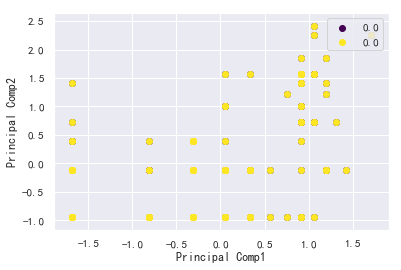

In [222]:
    
    #data = datasets.load_iris()
    data = datamatrix
    #data = pd.read_excel('C:/Users/IsaacHolmes/Desktop/pfm_train.xlsx')
    X = data
    y = data[:,1]
    
    X_trans = PCA().transform(X)
    
    x1 = X_trans[:,0]
    x2 = X_trans[:,1]
    
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np. linspace(0,1,len(np.unique(y)))]
    
    class_distr = []
    for i,l in enumerate(np.unique(y)):
        _x1 = x1[y == 1]
        _x2 = x2[y == 1]
        _y = y[y == 1]
        class_distr.append(plt.scatter(_x1,_x2,color=colors[i]))
        
    plt.legend(class_distr,y,loc = 1)
    
    plt.xlabel('Principal Comp1')
    plt.ylabel('Principal Comp2')
    plt.show()
    

    

In [223]:
X_trans

array([[ 0.91782583, -0.95259316,  0.        ,  0.        ,  0.        ],
       [ 0.32978828, -0.10915908,  0.        ,  0.        ,  0.        ],
       [ 0.75076016, -0.95259316,  0.        ,  0.        ,  0.        ],
       ...,
       [ 0.05060579, -0.95259316,  0.        ,  0.        ,  0.        ],
       [-1.68383431, -0.95259316,  1.        ,  0.        ,  0.        ],
       [-0.30932305, -0.10915908,  0.        ,  1.        ,  0.        ]])

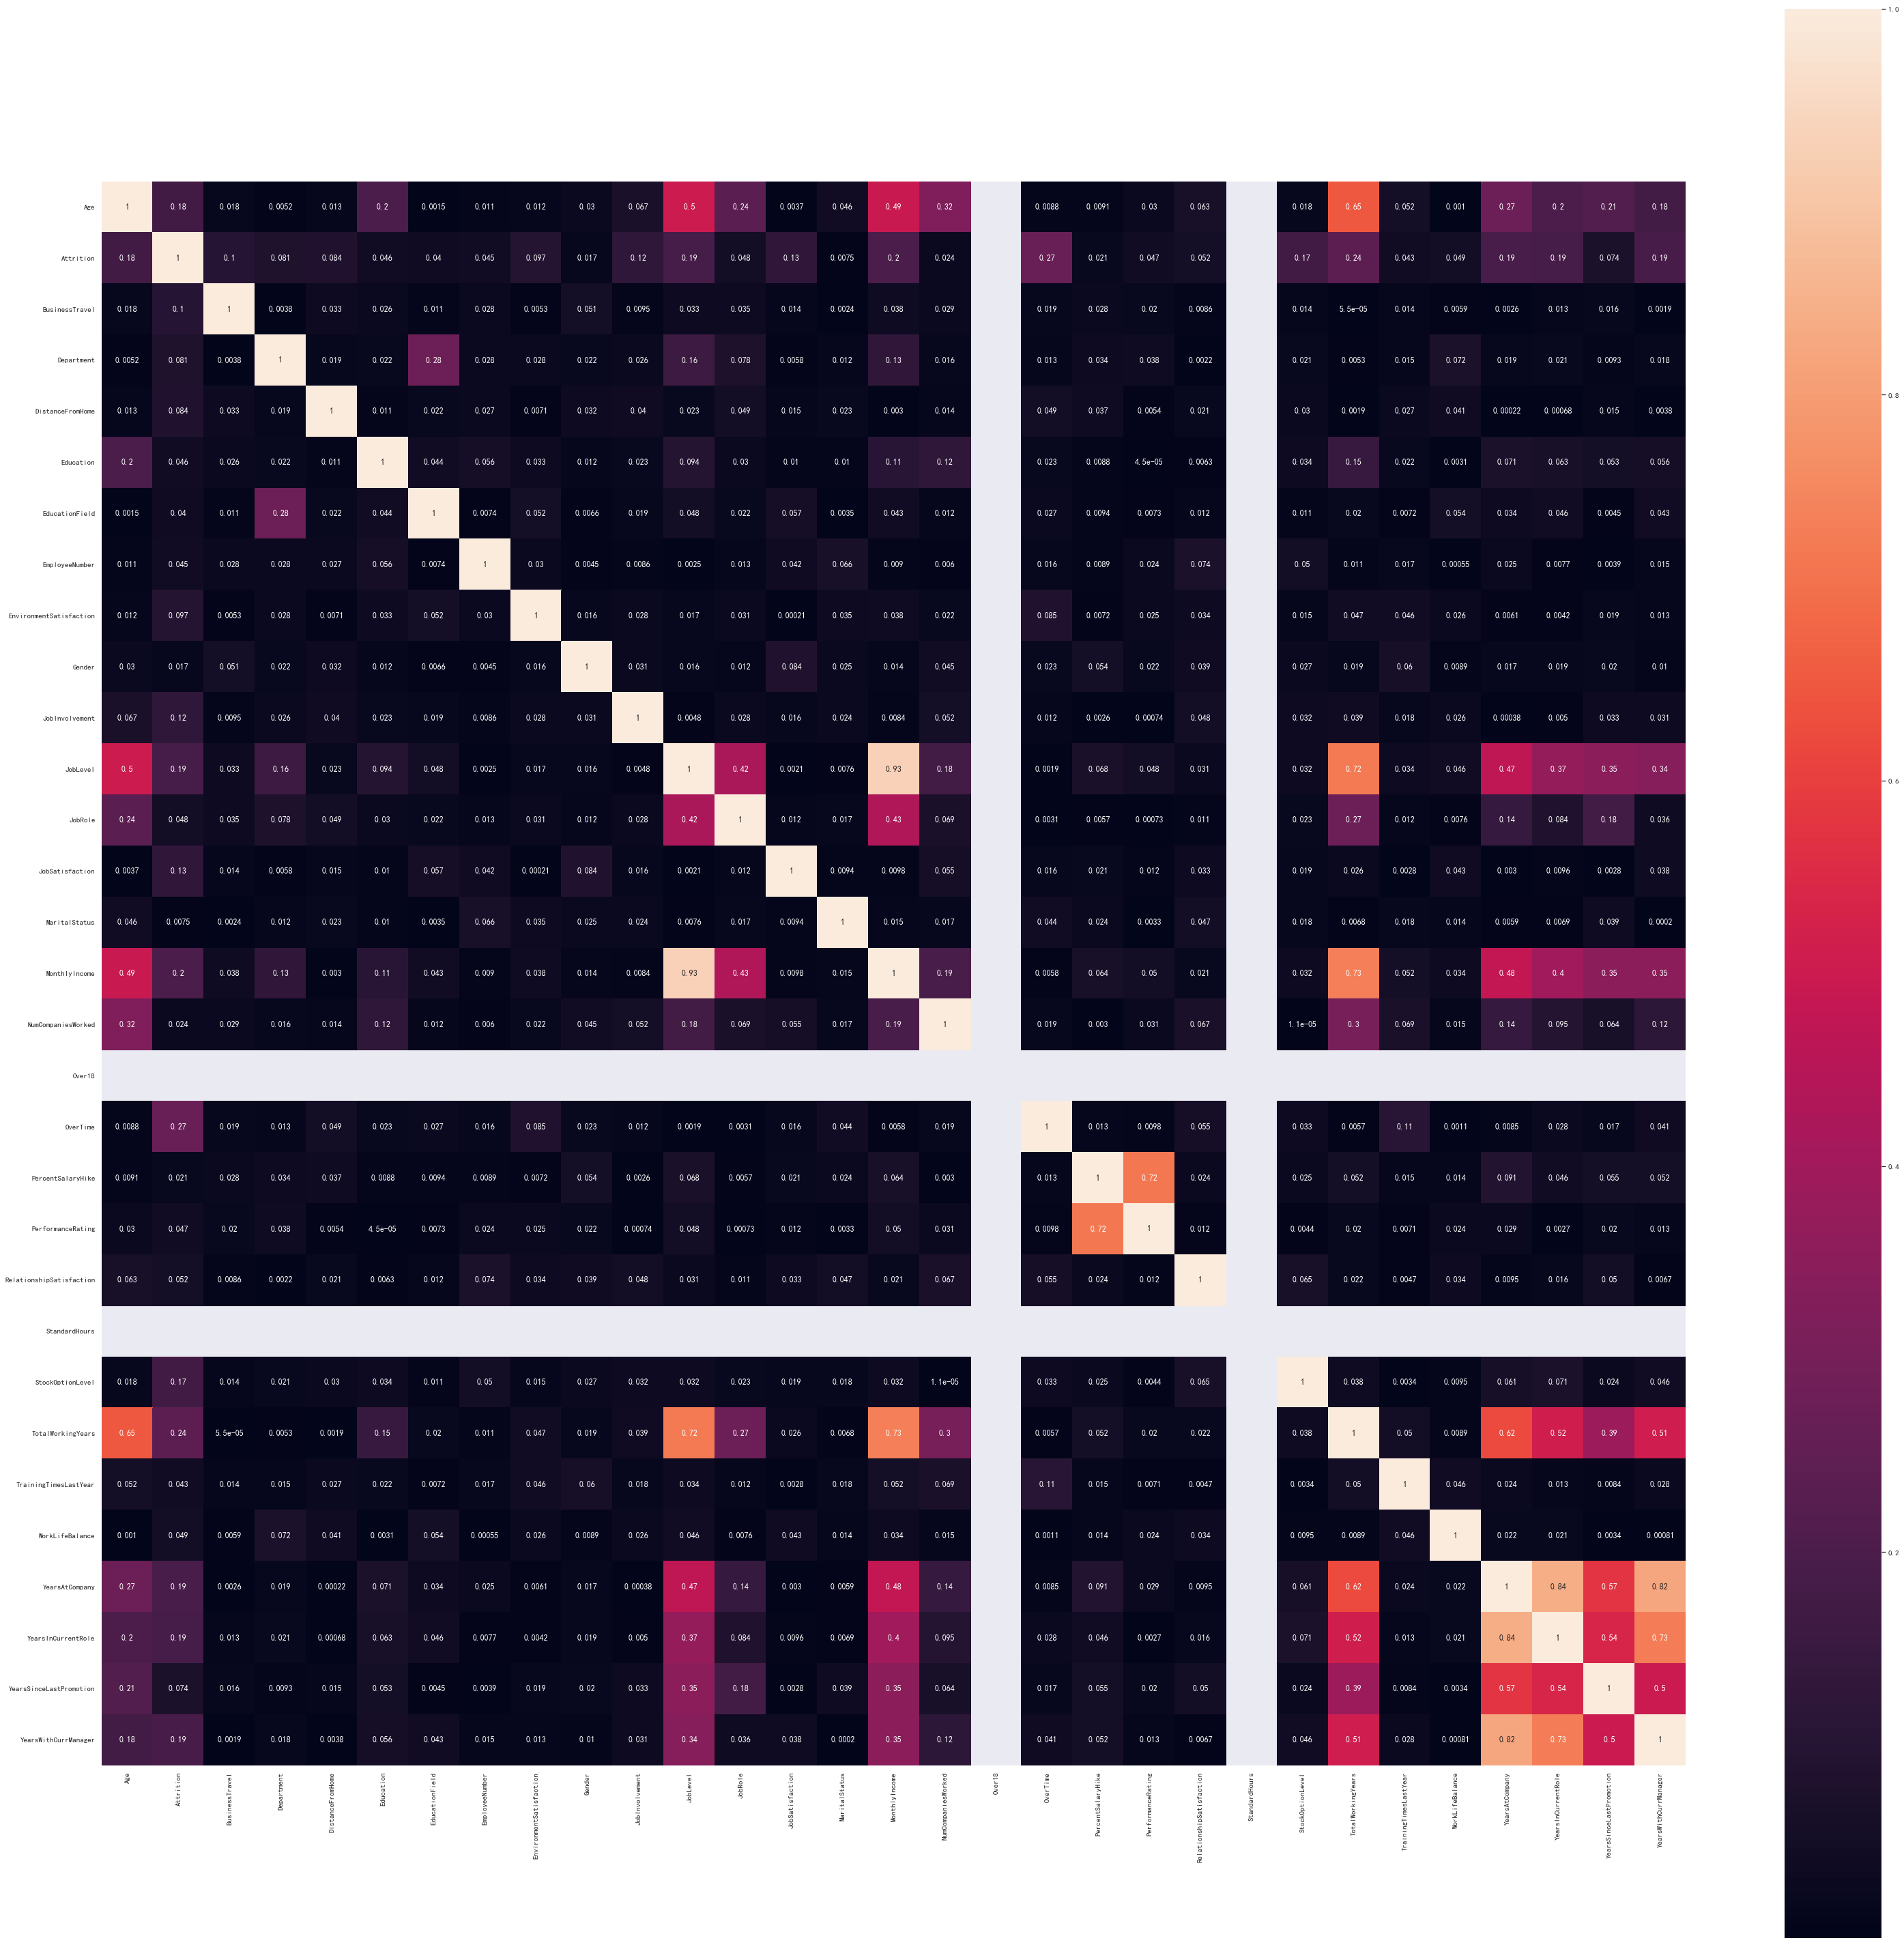

In [95]:
def corr_heat(df):
    dfData = abs(df.corr())
    plt.subplots(figsize=(52, 52)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True)
    plt.savefig('C:/Users/IsaacHolmes/Desktop/BluesStateRelation.png')
    plt.show()
corr_heat(data)


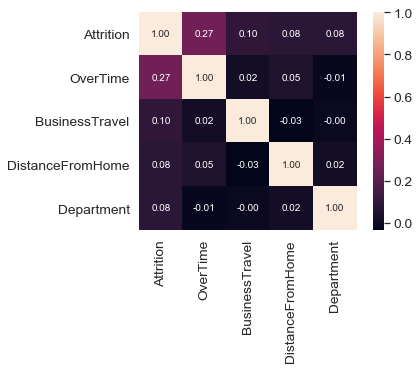

In [97]:
k = 5
cols = corrmat.nlargest(k,'Attrition')['Attrition'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,    xticklabels=cols.values)
plt.show()